## Importing Libraries ####

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

C:\Python36\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
dataset = pd.read_csv('churn_data.csv') # Users who were 60 days enrolled, churn in the next 30

## EDA ####

In [3]:
print(dataset.head(5)) # Viewing the Data

    user  churn   age housing  credit_score  deposits  withdrawal  \
0  55409      0  37.0      na           NaN         0           0   
1  23547      0  28.0       R         486.0         0           0   
2  58313      0  35.0       R         561.0        47           2   
3   8095      0  26.0       R         567.0        26           3   
4  61353      1  27.0      na           NaN         0           0   

   purchases_partners  purchases  cc_taken     ...       waiting_4_loan  \
0                   0          0         0     ...                    0   
1                   1          0         0     ...                    0   
2                  86         47         0     ...                    0   
3                  38         25         0     ...                    0   
4                   2          0         0     ...                    0   

   cancelled_loan  received_loan  rejected_loan  zodiac_sign  \
0               0              0              0          Leo   
1     

In [4]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [5]:
dataset.dtypes

user                         int64
churn                        int64
age                        float64
housing                     object
credit_score               float64
deposits                     int64
withdrawal                   int64
purchases_partners           int64
purchases                    int64
cc_taken                     int64
cc_recommended               int64
cc_disliked                  int64
cc_liked                     int64
cc_application_begin         int64
app_downloaded               int64
web_user                     int64
app_web_user                 int64
ios_user                     int64
android_user                 int64
registered_phones            int64
payment_type                object
waiting_4_loan               int64
cancelled_loan               int64
received_loan                int64
rejected_loan                int64
zodiac_sign                 object
left_for_two_month_plus      int64
left_for_one_month           int64
rewards_earned      

In [6]:
dataset.describe() # Distribution of Numerical Variables

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


Cleaning Data

In [7]:
#dataset[dataset.credit_score < 300]
#dataset = dataset[dataset.credit_score >= 300]

Removing NaN

In [8]:
dataset.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [9]:
(dataset.isna().sum()/dataset.shape[0])* 100

user                        0.000000
churn                       0.000000
age                         0.014815
housing                     0.000000
credit_score               29.744444
deposits                    0.000000
withdrawal                  0.000000
purchases_partners          0.000000
purchases                   0.000000
cc_taken                    0.000000
cc_recommended              0.000000
cc_disliked                 0.000000
cc_liked                    0.000000
cc_application_begin        0.000000
app_downloaded              0.000000
web_user                    0.000000
app_web_user                0.000000
ios_user                    0.000000
android_user                0.000000
registered_phones           0.000000
payment_type                0.000000
waiting_4_loan              0.000000
cancelled_loan              0.000000
received_loan               0.000000
rejected_loan               0.000000
zodiac_sign                 0.000000
left_for_two_month_plus     0.000000
l

In [10]:
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

In [11]:
dataset=dataset[pd.notnull(dataset.age)]

 Histograms

In [12]:
dataset2 = dataset.drop(columns = ['user', 'churn'])

In [13]:
dataset_numonly=dataset.drop(columns=['user', 'churn','housing','payment_type','zodiac_sign'])

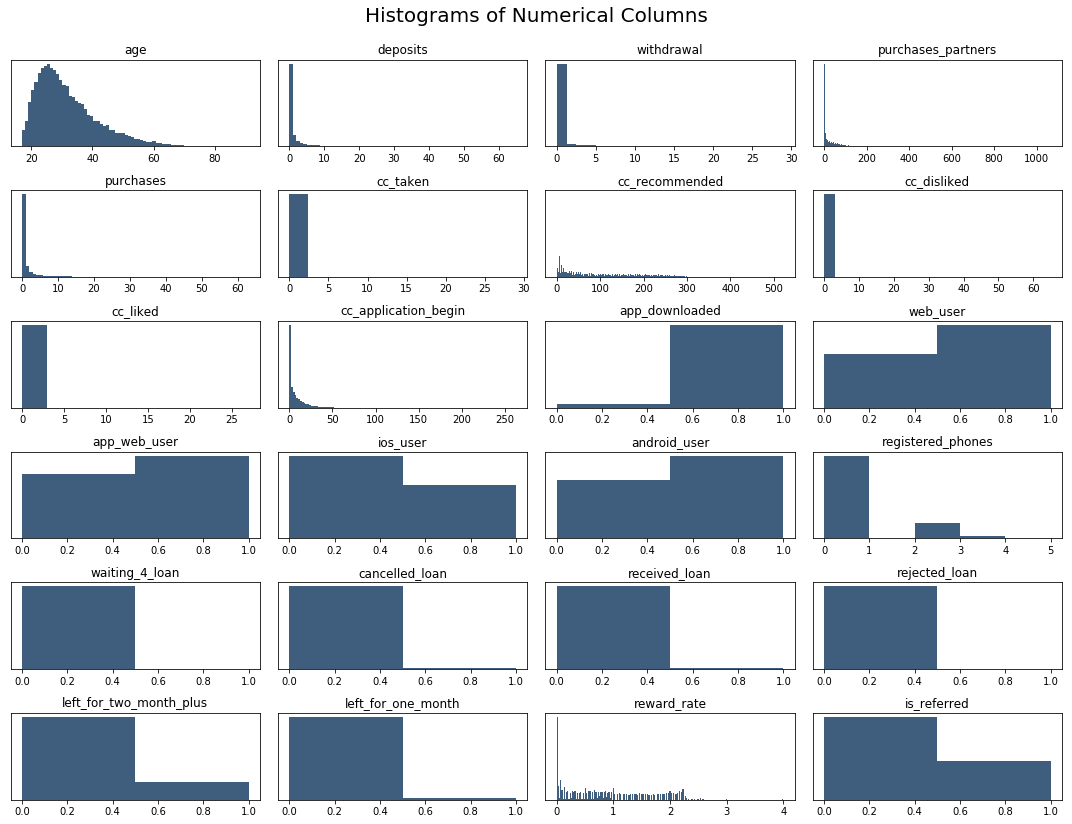

In [14]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset_numonly.shape[1] + 1):
    plt.subplot(6, 4, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset_numonly.columns.values[i - 1])
    vals = np.size(dataset_numonly.iloc[:, i - 1].unique())
    plt.hist(dataset_numonly.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

 Pie Plots

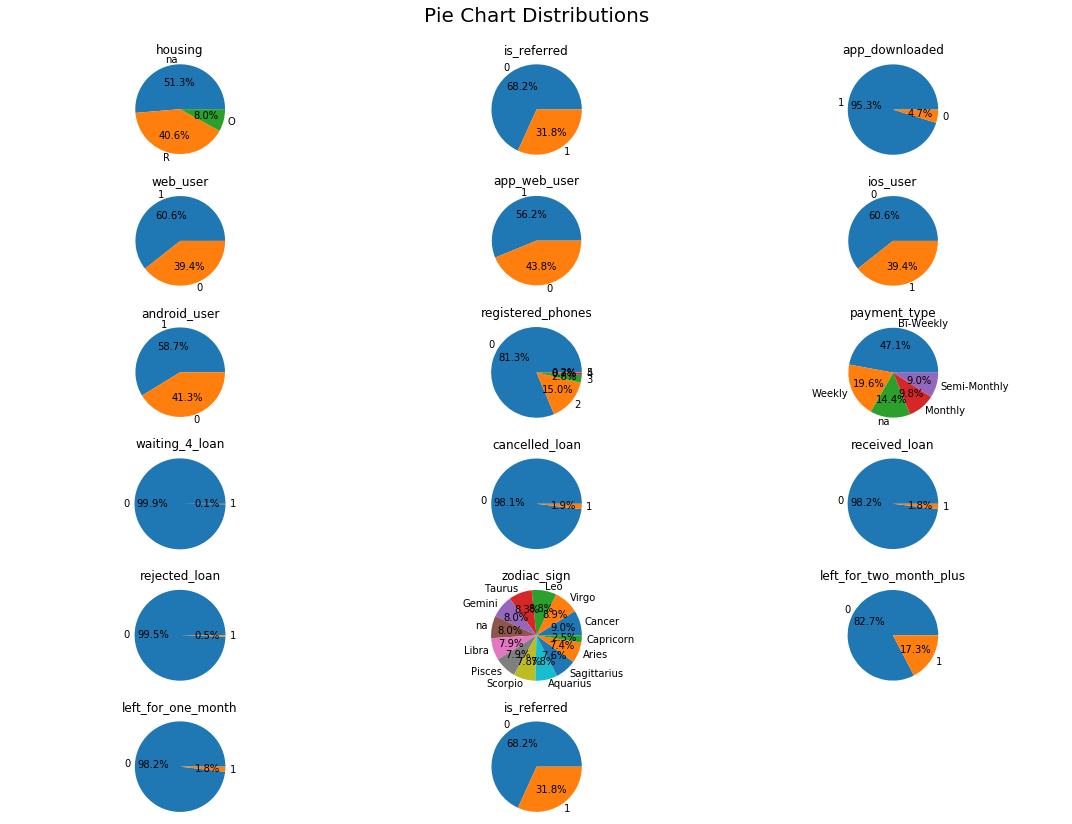

In [15]:
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

 Exploring Uneven Features

In [16]:
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [17]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [18]:
dataset[dataset2.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [19]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [20]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    207
0    184
Name: churn, dtype: int64

 Correlation with Response Variable

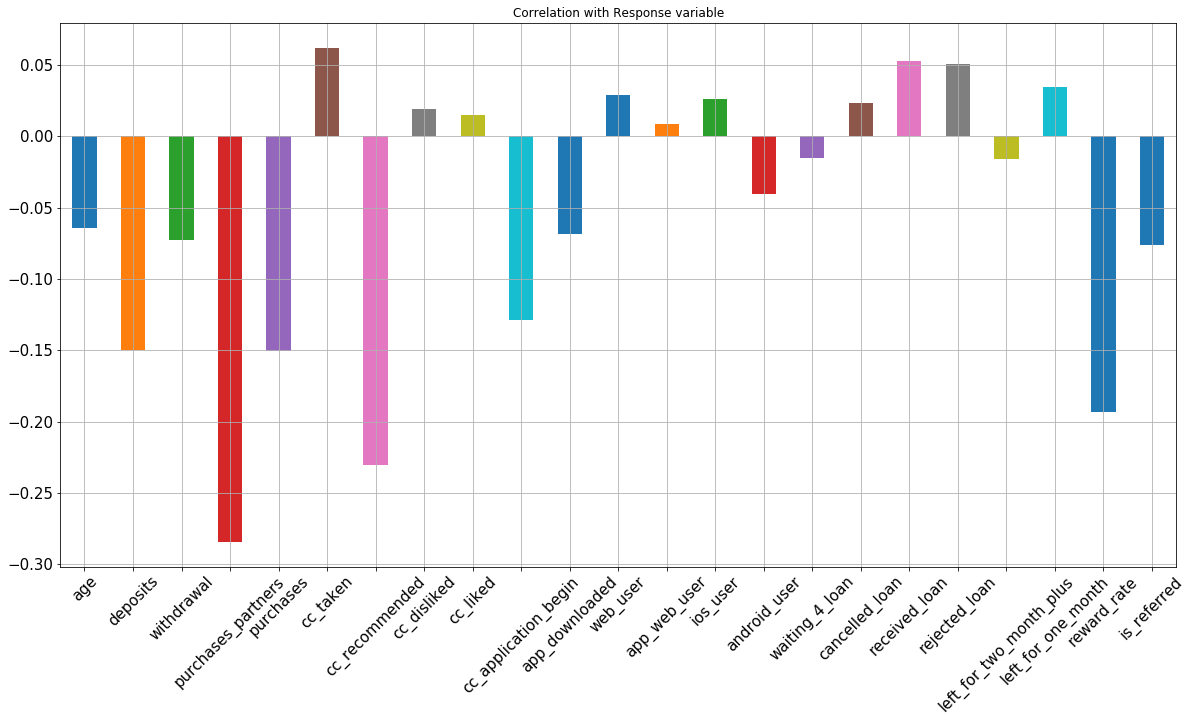

In [31]:
dataset2.drop(columns = ['housing', 'payment_type',
                         'registered_phones', 'zodiac_sign']
    ).corrwith(dataset.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True)

 Correlation Matrix

In [20]:
sn.set(style="white")

Compute the correlation matrix

In [21]:
corr = dataset.drop(columns = ['user', 'churn']).corr()

Generate a mask for the upper triangle

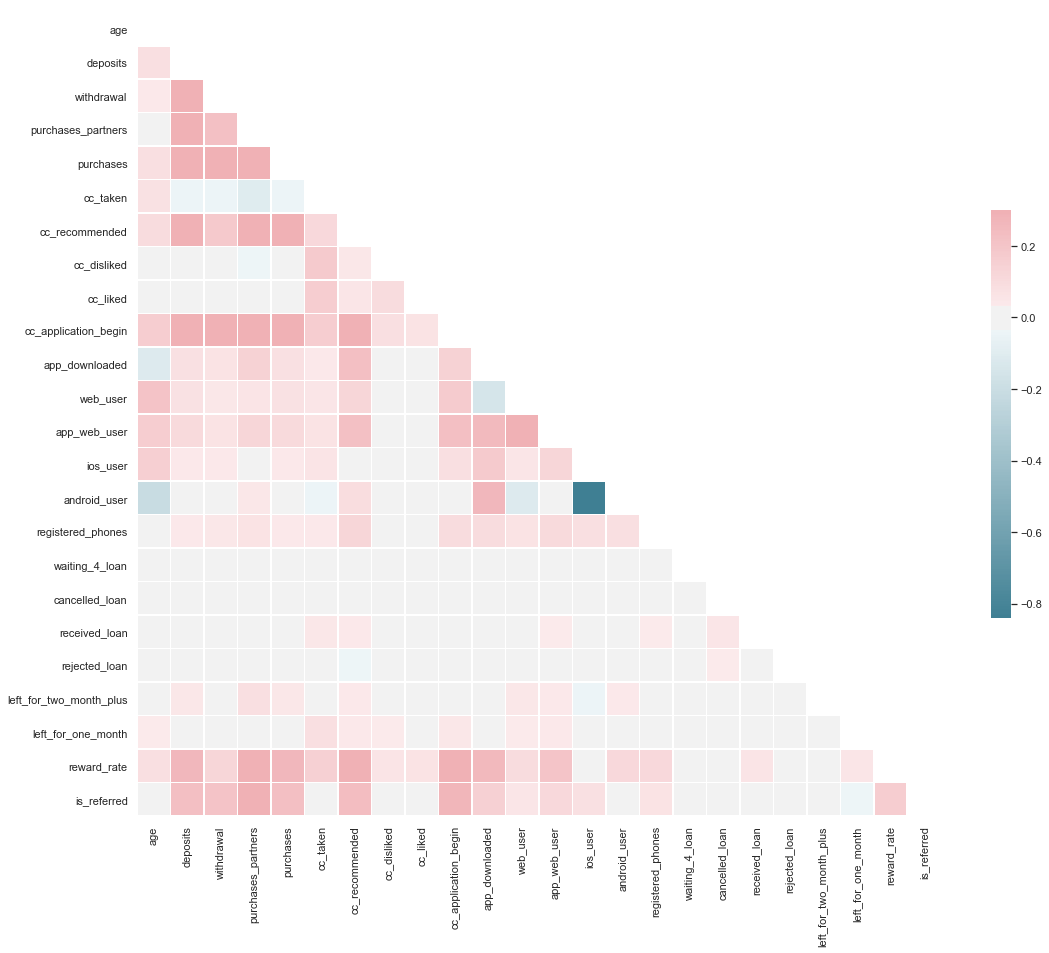

In [30]:
###Generate a mask for the upper triangle
##mask = np.zeros_like(corr, dtype=np.bool)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

##Generate a custom diverging colormap
f, ax = plt.subplots(figsize=(18, 15))

##Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

##Draw the heatmap with the mask and correct aspect ratio

sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


Removing Correlated Fields

In [31]:
dataset = dataset.drop(columns = ['app_web_user'])

 Note: Although there are somewhat correlated fields, they are not colinear<br>
 These feature are not functions of each other, so they won't break the model<br>
 But these feature won't help much either. Feature Selection should remove them.

In [32]:
dataset.to_csv('new_churn_data.csv', index = False)